## **Project 1**: *Yelp Business Rating Prediction using Tensorflow*


In [18]:
# Import libraries
import pandas as pd
import tensorflow as tf
import numpy as np
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

**Data Import**

In [19]:
# Load data
business_data_path = "../data/yelp_dataset/yelp_academic_dataset_business.json"
review_data_path = "../data/yelp_dataset/yelp_academic_dataset_review.json"
business_df = pd.read_json(business_data_path, lines=True, nrows=95000)
review_df = pd.read_json(review_data_path, lines=True, nrows=95000)

In [20]:
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturopathic/Holistic, Acupuncture, Health & Medical, Nutritionists",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Mailbox Centers, Printing Services","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', 'Wednesday': '8:0-18:30', 'Thursday': '8:0-18:30', 'Friday': '8:0-18:30', 'Saturday': '8:0-14:0'}"
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsPriceRange2': '2', 'CoatCheck': 'False', 'RestaurantsTakeOut': 'False', 'RestaurantsDelivery': 'False', 'Caters': 'False', 'WiFi': 'u'no'', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}', 'WheelchairAccessible': 'True', 'HappyHour': 'False', 'OutdoorSeating': 'False', 'HasTV': 'False', 'RestaurantsReservations': 'False', 'DogsAllowed': 'False', 'ByAppointmentOnly': 'False'}","Department Stores, Shopping, Fashion, Home & Garden, Electronics, Furniture Stores","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', 'Wednesday': '8:0-22:0', 'Thursday': '8:0-22:0', 'Friday': '8:0-23:0', 'Saturday': '8:0-23:0', 'Sunday': '8:0-22:0'}"
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeating': 'False', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'BikeParking': 'True', 'RestaurantsPriceRange2': '1', 'RestaurantsTakeOut': 'True', 'ByAppointmentOnly': 'False', 'WiFi': 'u'free'', 'Alcohol': 'u'none'', 'Caters': 'True'}","Restaurants, Food, Bubble Tea, Coffee & Tea, Bakeries","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', 'Wednesday': '7:0-20:0', 'Thursday': '7:0-20:0', 'Friday': '7:0-21:0', 'Saturday': '7:0-21:0', 'Sunday': '7:0-21:0'}"
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'WheelchairAccessible': 'True', 'RestaurantsTakeOut': 'True', 'BusinessParking': '{'garage': None, 'street': None, 'validated': None, 'lot': True, 'valet': False}', 'BikeParking': 'True', 'GoodForKids': 'True', 'Caters': 'False'}","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-22:0', 'Friday': '12:0-22:0', 'Saturday': '12:0-22:0', 'Sunday': '12:0-18:0'}"


In [21]:
review_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,"I've taken a lot of spin classes over the years, and nothing compares to the classes at Body Cycle. From the nice, clean space and amazing bikes, to the welcoming and motivating instructors, every class is a top notch work out.\n\nFor anyone who struggles to fit workouts in, the online scheduling system makes it easy to plan ahead (and there's no need to line up way in advanced like many gyms make you do).\n\nThere is no way I can write this review without giving Russell, the owner of Body Cycle, a shout out. Russell's passion for fitness and cycling is so evident, as is his desire for all of his clients to succeed. He is always dropping in to classes to check in/provide encouragement, and is open to ideas and recommendations from anyone. Russell always wears a smile on his face, even when he's kicking your butt in class!",2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,"Family diner. Had the buffet. Eclectic assortment: a large chicken leg, fried jalapeño, tamale, two rolled grape leaves, fresh melon. All good. Lots of Mexican choices there. Also has a menu with breakfast served all day long. Friendly, attentive staff. Good place for a casual relaxed meal with no expectations. Next to the Clarion Hotel.",2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favorite is the lamb curry and korma. With 10 different kinds of naan!!! Don't let the outside deter you (because we almost changed our minds)...go in and try something new! You'll be glad you did!",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,"Cute interior and owner (?) gave us tour of upcoming patio/rooftop area which will be great on beautiful days like today. Cheese curds were very good and very filling. Really like that sandwiches come w salad, esp after eating too many curds! Had the onion, gruyere, tomato sandwich. Wasn't too much cheese which I liked. Needed something else...pepper jelly maybe. Would like to see more menu options added such as salads w fun cheeses. Lots of beer and wine as well as limited cocktails. Next time I will try one of the draft wines.",2017-01-14 20:54:15


**Data Cleaning**

In [22]:
# Filter businesses with at least 20 reviews
filtered_business_df = business_df[business_df['review_count'] >= 20]
print("# of businesses removed: {}".format(len(business_df) - len(filtered_business_df)))


# Merge the review data with filtered businesses to ensure only relevant reviews are considered
review_df_filtered = pd.merge(review_df, filtered_business_df[['business_id', 'review_count', 'is_open']], on='business_id', how='inner')

print(review_df_filtered.head())
print(review_df_filtered.shape)
print(review_df_filtered.columns)

# of businesses removed: 55856
                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0      3       0      0     0   
1      5       1      0     1   
2      3       0      0     0   
3      5       1      0     1   
4      4       1      0     1   

                                                                                                                                                                                                                                                                                                                   

In [23]:
# Save the filtered business data to a new JSON file
filtered_business_save_path = '../data/yelp_dataset/filtered_businesses'
os.makedirs(filtered_business_save_path, exist_ok=True)
filtered_business_df.to_json(f'{filtered_business_save_path}/filtered_businesses.json', orient='records', lines=True)

In [24]:
# Save the filtered review data to a new JSON file
filtered_reviews_save_path = '../data/yelp_dataset/filtered_reviews'
os.makedirs(filtered_reviews_save_path, exist_ok=True)
review_df_filtered.to_json(f'{filtered_reviews_save_path}/filtered_reviews.json', orient='records', lines=True)

**TF-IDF Vectorization and Label Preparation**

In [25]:
# Initialize and fit TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, max_features=5000) 
tfidf_matrix = tfidf.fit_transform(review_df_filtered['text'])

# Convert labels from 1-5 to 0-4
# review_df_filtered.loc[:, 'stars'] = review_df_filtered['stars'] - 1

df_tfidf_matrix = pd.DataFrame(data=tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
df_tfidf_matrix

,00,000,00pm,10,100,10pm,11,11am,12,13,...,younger,your,yourself,yuck,yum,yummy,zero,zone,zoo,zucchini
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.052964,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.166363,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.198633,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86502,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
86503,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
86504,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
86505,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.058573,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


**Add the review count as an input feature**

In [26]:
# Add the number of reviews to the dataset, additional feature
df_tfidf_matrix['review_count'] = review_df_filtered['review_count']
df_tfidf_matrix['is_open'] = review_df_filtered['is_open']
print(df_tfidf_matrix.shape)
df_tfidf_matrix.head()

(86507, 5002)


,00,000,00pm,10,100,10pm,11,11am,12,13,...,yourself,yuck,yum,yummy,zero,zone,zoo,zucchini,review_count,is_open
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,169,1
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,144,0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,47,1
3,0.0,0.0,0.0,0.166363,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.198633,0.0,0.0,0.0,0.0,181,1
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,32,0


**Data Splitting and Model Definition**

In [27]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_tfidf_matrix, review_df_filtered['stars'], test_size=0.2, random_state=42)

# Define a function to create and compile the model
def build_model(input_dim, layers, activation, optimizer):
    model = Sequential()
    model.add(Dense(layers[0], activation=activation, input_dim=input_dim))  # Reduced layer complexity
    if len(layers) > 1:  # Add second layer only if necessary
        model.add(Dense(layers[1], activation=activation))
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

layer_structure = [64]  # Reduced from [128, 64] to just [64]

In [28]:
X_train.head()

,00,000,00pm,10,100,10pm,11,11am,12,13,...,yourself,yuck,yum,yummy,zero,zone,zoo,zucchini,review_count,is_open
43493,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,436,1
48790,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.152772,0.0,0.000000,0.0,178,1
29643,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.086530,0.0,0.565292,0.0,96,1
77295,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,263,1
2031,0.0,0.0,0.0,0.0,0.050266,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,25,1


In [29]:
X_test.head()

,00,000,00pm,10,100,10pm,11,11am,12,13,...,yourself,yuck,yum,yummy,zero,zone,zoo,zucchini,review_count,is_open
21374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100,0
17605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30,1
21158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4554,1
78896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,320,1
85054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.185421,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,197,1


In [30]:
# Convert Dataframes to numpy arrays for tensorflow model
X_train_dense = X_train.to_numpy()
X_test_dense = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

**Model Training and Evaluation**

In [31]:
# Model hyperparameters
activations = ['relu', 'sigmoid', 'tanh']
optimizers = ['adam', 'sgd']
configurations = [(a, o) for a in activations for o in optimizers]

# Train and evaluate models
results = []
model_save_path = "../model"
best_rmse = float('inf')
best_model_path = ""

if not os.path.exists(model_save_path):
    os.makedirs(model_save_path)

for activation, optimizer in configurations:
    model = build_model(X_train_dense.shape[1], layer_structure, activation, optimizer)
    early_stopping = EarlyStopping(monitor='val_loss', patience=2)  # Reduced patience
    history = model.fit(X_train_dense, y_train, epochs=10, batch_size=512, validation_data=(X_test_dense, y_test), callbacks=[early_stopping])  # Increased batch size

    y_pred = model.predict(X_test_dense)
    rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_test))
    num_layers = len(layer_structure) + 1
    neuron_counts = layer_structure + [1]
    results.append((activation, optimizer, num_layers, neuron_counts, history.history, rmse))
    model_save_name = f'model_{activation}_{optimizer}.keras'
    model.save(os.path.join(model_save_path, model_save_name))

    if rmse < best_rmse:
        best_rmse = rmse
        best_model_path = os.path.join(model_save_path, model_save_name)

# Convert results to DataFrame and save
results_df = pd.DataFrame(results, columns=['Activation', 'Optimizer', 'Num of Layers', 'Neuron Count', 'History', 'RMSE'])
results_df.to_csv(os.path.join(model_save_path, 'model_performance.csv'), index=False)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 45.1502 - val_loss: 4.5919
Epoch 2/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.8501 - val_loss: 2.5702
Epoch 3/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.3196 - val_loss: 1.9458
Epoch 4/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.8041 - val_loss: 1.5749
Epoch 5/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.4472 - val_loss: 1.3092
Epoch 6/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2048 - val_loss: 1.1279
Epoch 7/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0427 - val_loss: 0.9982
Epoch 8/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9329 - val_loss: 0.9270
Epoch 9/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8706 - val_loss: 0.8683
Epoch 10/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8210 - val_loss: 0.8309
541/541 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 67596534686873494555205828608.0000 - val_loss: 1357104047187907651305472.0000
Epoch 2/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 568501522667573100937216.0000 - val_loss: 5573221990319544860672.0000
Epoch 3/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2334663513554074730496.0000 - val_loss: 22887506611552649216.0000
Epoch 4/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9587747991276486656.0000 - val_loss: 93992034968272896.0000
Epoch 5/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 39373988132028416.0000 - val_loss: 385996931727360.0000
Epoch 6/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 161696911982592.0000 - val_loss: 1585169956864.0000
Epoch 7/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 664039260160.0000 - val_loss: 6509804544.0000
Epoch 8/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2727006976.0000 - val_loss: 26733790.0000
Epoch 9/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/ste

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 5.5724 - val_loss: 1.7542
Epoch 2/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.6602 - val_loss: 1.5521
Epoch 3/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.4403 - val_loss: 1.2412
Epoch 4/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0793 - val_loss: 0.8737
Epoch 5/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.8237 - val_loss: 0.8129
Epoch 6/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.7164 - val_loss: 0.6750
Epoch 7/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6513 - val_loss: 0.6411
Epoch 8/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6056 - val_loss: 0.6263
Epoch 9/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5908 - val_loss: 0.6608
Epoch 10/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5979 - val_loss: 0.6068
541/541 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.0773 - val_loss: 1.8082
Epoch 2/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7400 - val_loss: 1.7915
Epoch 3/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7458 - val_loss: 1.8670
Epoch 4/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7708 - val_loss: 1.8653
541/541 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.0640 - val_loss: 1.6321
Epoch 2/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.4896 - val_loss: 1.0485
Epoch 3/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.8628 - val_loss: 0.6977
Epoch 4/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6665 - val_loss: 0.8374
Epoch 5/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6417 - val_loss: 0.6335
Epoch 6/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5839 - val_loss: 0.6205
Epoch 7/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5690 - val_loss: 0.6148
Epoch 8/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5772 - val_loss: 0.6071
Epoch 9/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5507 - val_loss: 0.6076
Epoch 10/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5381 - val_loss: 0.6105
541/541 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.3814 - val_loss: 2.0051
Epoch 2/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7727 - val_loss: 1.8026
Epoch 3/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7758 - val_loss: 1.8005
Epoch 4/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7635 - val_loss: 1.8207
Epoch 5/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7681 - val_loss: 1.8071
541/541 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step


In [32]:
pd.set_option('display.max_colwidth', None)
results_df.head(6)

,Activation,Optimizer,Num of Layers,Neuron Count,History,RMSE
0,relu,adam,2,"[64, 1]","{'loss': [16.87496566772461, 3.3377432823181152, 2.1853463649749756, 1.7158809900283813, 1.3906803131103516, 1.1629587411880493, 1.0183861255645752, 0.9182856678962708, 0.8565781712532043, 0.8069899082183838], 'val_loss': [4.591858386993408, 2.570188283920288, 1.9458471536636353, 1.5749326944351196, 1.3092023134231567, 1.127903938293457, 0.9982104301452637, 0.9270355701446533, 0.8682811856269836, 0.8308896422386169]}",0.911531
1,relu,sgd,2,"[64, 1]","{'loss': [1.7151826321625108e+28, 2.524655441141072e+23, 1.0367993548085867e+21, 4.2578169971207045e+18, 1.7485564555034624e+16, 71807851823104.0, 294892765184.0, 1211034496.0, 4973356.5, 20425.2578125], 'val_loss': [1.3571040471879077e+24, 5.573221990319545e+21, 2.288750661155265e+19, 9.39920349682729e+16, 385996931727360.0, 1585169956864.0, 6509804544.0, 26733790.0, 109789.3046875, 452.48089599609375]}",21.271599
2,sigmoid,adam,2,"[64, 1]","{'loss': [2.884875774383545, 1.6276733875274658, 1.353175401687622, 0.9969953298568726, 0.7820330858230591, 0.6915417313575745, 0.6480274200439453, 0.607890248298645, 0.5881216526031494, 0.5863251090049744], 'val_loss': [1.7542047500610352, 1.5521241426467896, 1.2412415742874146, 0.8736663460731506, 0.8129435181617737, 0.6749793291091919, 0.641092836856842, 0.6263285279273987, 0.6608174443244934, 0.6068487763404846]}",0.779005
3,sigmoid,sgd,2,"[64, 1]","{'loss': [1.8224022388458252, 1.752088189125061, 1.7507327795028687, 1.7546875476837158], 'val_loss': [1.8082168102264404, 1.7915081977844238, 1.866987943649292, 1.8653165102005005]}",1.365766
4,tanh,adam,2,"[64, 1]","{'loss': [2.0297515392303467, 1.3402810096740723, 0.7910730242729187, 0.6563705801963806, 0.6117308139801025, 0.5937795639038086, 0.5735199451446533, 0.5665478706359863, 0.5596867799758911, 0.5508894920349121], 'val_loss': [1.6320669651031494, 1.048514723777771, 0.6976618766784668, 0.8373801112174988, 0.633522629737854, 0.6204890012741089, 0.6147733926773071, 0.607053279876709, 0.6075941920280457, 0.6105052828788757]}",0.781348
5,tanh,sgd,2,"[64, 1]","{'loss': [2.1078951358795166, 1.7711900472640991, 1.77936851978302, 1.768187165260315, 1.7742003202438354], 'val_loss': [2.0050644874572754, 1.8026305437088013, 1.8005481958389282, 1.8207447528839111, 1.8070884943008423]}",1.344280


**Finding our best model**

In [33]:
best_model_loaded = tf.keras.models.load_model(best_model_path)

print("Best Model:", best_model_path)
print("Best RMSE:", best_rmse)

best_model_predictions = best_model_loaded.predict(X_test_dense)
best_model_predictions = best_model_predictions.flatten()

Best Model: ../model/model_sigmoid_adam.keras
Best RMSE: 0.7790049946985574
541/541 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step


**Regression and Lift Chart**

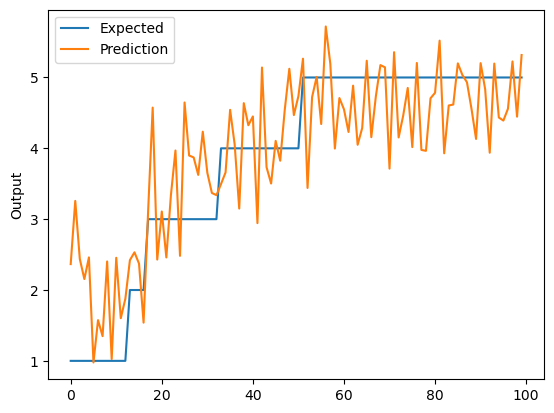

In [34]:
# Regression chart.
def chart_regression(pred, y, sort=True, subset=100):
    y = y.flatten()
    t = pd.DataFrame({'pred': pred, 'y': y})
    if sort:
        t = t.sample(n=subset, random_state=42).sort_values(by=['y'])
    plt.plot(t['y'].tolist(), label='Expected')
    plt.plot(t['pred'].tolist(), label='Prediction')
    plt.ylabel('Output')
    plt.legend()
    plt.show()

chart_regression(best_model_predictions, y_test, subset=100)



**Business Predictions vs Actuals**

In [109]:
merged_df = pd.merge(review_df_filtered, filtered_business_df, on='business_id') 

test_indices = X_test.index
test_reviews = merged_df.loc[test_indices]

comparison_df = pd.DataFrame({ 
    'Business': test_reviews['name'], 
    'Category': test_reviews['categories'], 
    'Actual Rating': y_test,
    'Actual Predicted Rating': best_model_predictions,
})

sampled_businesses = comparison_df.sample(n=5, random_state=None).reset_index(drop=True)
sampled_businesses.head()


,Business,Category,Actual Rating,Actual Predicted Rating
0,Favela Chic,"Chicken Wings, Mexican, Pizza, Tacos, Restaurants",2,2.131455
1,Three Muses,"Nightlife, Jazz & Blues, American (New), Music Venues, Restaurants, Gastropubs, Arts & Entertainment",4,4.507610
2,Desire Oyster Bar,"Southern, Event Planning & Services, Restaurants, Cajun/Creole, Seafood, Live/Raw Food, Hotels & Travel, Hotels",3,3.379365
3,Remember Me Vintage Clothing & Costumes,"Used, Vintage & Consignment, Shopping, Antiques, Fashion, Arts & Crafts, Formal Wear, Costumes, Clothing Rental",1,1.233811
4,Gaylord Opryland Resort & Convention Center,"Venues & Event Spaces, Performing Arts, Arts & Entertainment, Hotels & Travel, Food, Convenience Stores, American (New), Beauty & Spas, Restaurants, Museums, Event Planning & Services, Hotels, Cinema, Resorts, Day Spas",3,3.213259
